# Notebook activity A2.5  Performing ADF tests in R 

In this notebook activity, we will be using R to perform the ADF test for a unit root in a time series. The time series we will investigate is from the UK GDP dataset. 

As a reminder, the variables in this dataset are:

* `year`: the year that the observation relates to
* `quarter`: the quarter (of the year) that the observation relates to, taking the value 1, 2, 3 or 4
* `gdp`: the seasonally adjusted quarterly GDP in real terms (in millions of pounds sterling (£))
* `gdpGrowth`: the seasonally adjusted quarterly GDP growth rate (%).

The data for this dataset is stored in the data frame `ukGDP`.

## (a) Getting started

### (i)

Start by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the ukGDP data frame
data(ukGDP)
# Check the data frame has loaded OK
head(ukGDP)
tail(ukGDP)

## (b) Preparing the time series

### (i)

Use the empty code cell below to convert `gdp` to being a time series object called `gdpTS`. Produce a time plot of `gdpTS`.

#### Solution <a class="tocSkip">

The required code and resulting plot are given below.

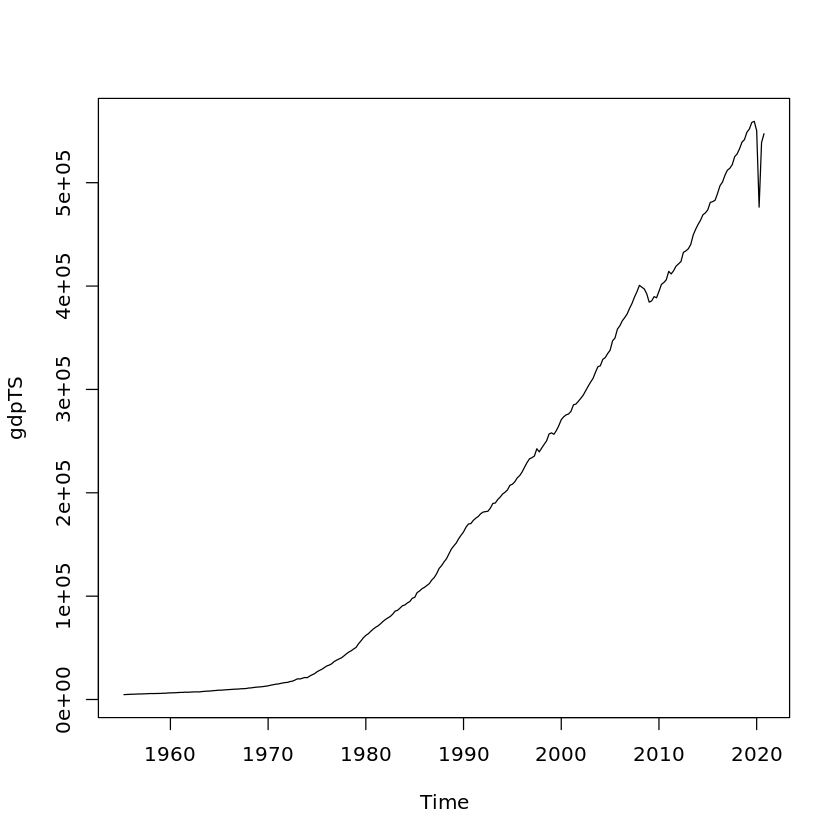

In [2]:
# Creating ts version of the data 
gdpTS <- ts(ukGDP$gdp, start = c(1955, 2), end = c(2020, 4), frequency = 4 )
# plot the GDP over time
plot(gdpTS)

### (ii)

Why does the time plot you produced in part (i) suggest that it is reasonable not to include the data from 2020 in further analysis?

#### Solution <a class="tocSkip">

The data for 2020 seem exceptional compared with the rest of the data. There appears to have been a *structural break* (the timing of which fits in with the start of the COVID-19 pandemic).

---

###  <a class="tocSkip">

Using only part of a time series can be handled when a time series object is created, by adding an extra argument to the `ts()` function, the argument `end`. This argument takes the same form as the argument `start`, only it specifies which is the *last* time point we want to include. In Notebook Activity A2.2 we removed the observations from 2020 using the `head()` function instead.

### (iii)

Recreate the time series object `gdpTS`, this time only including observations between 1955 Q2 and 2019 Q4, by running the first command below. Check that this seems to have been done correctly by comparing the resulting time plot with the time plot you created in part (i).

In [ ]:
# Creating ts version of the data 
gdpTS <- ts(ukGDP$gdp, start = c(1955, 2), end = c(2019, 4), frequency = 4 )
# plot the GDP over time
plot(gdpTS)

#### Solution <a class="tocSkip">

Notice in the time plot you created, the final few points where the line dips dramatically are no longer included. So it does appear that the observations from 2020 have been dropped.

---

###  <a class="tocSkip">

As discussed in Subsection 5.3, we often transform data by taking the logarithm of the series $(Y_t)$ to reduce the skewness of data and to reduce the impact of any outliers. 

### (iv)

Use the empty code cell below to create a new time series variable, `logGDP`. (Note that this will not produce any output.)

#### Solution <a class="tocSkip">

The required code is given below.

In [4]:
logGDP <- log(gdpTS)

## (c) Exploring log(GDP) and its first differences

### (i)

Use the code cell below to create a time plot of `logGDP` and its correlogram. (Look back at Notebook activity A2.1 if you need a reminder about how to create a correlogram.)

#### Solution <a class="tocSkip">

The required code and resulting plots are given below. 

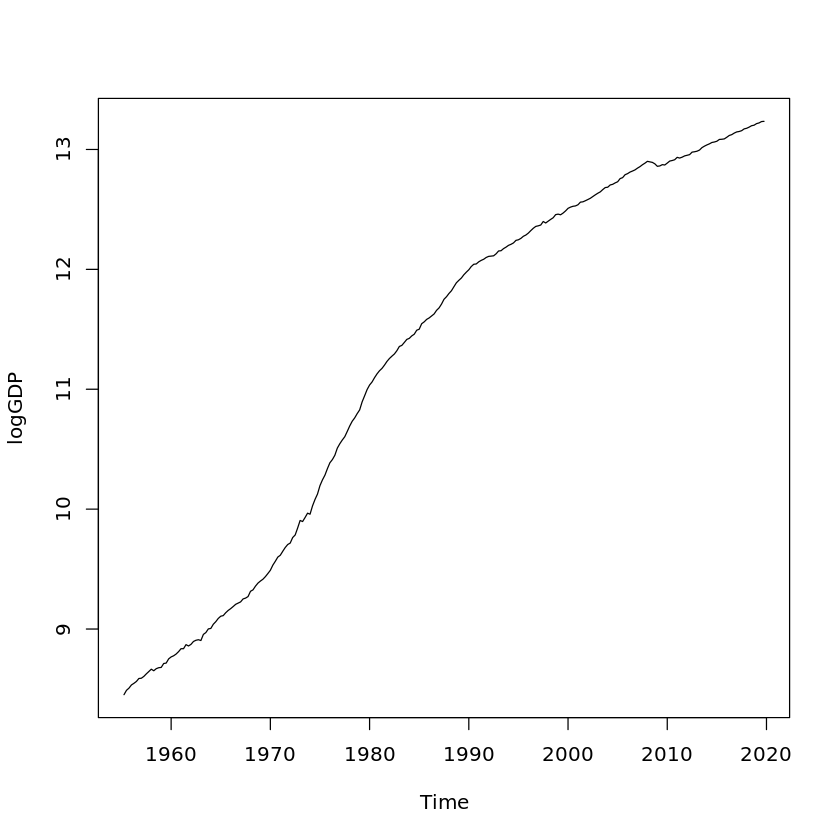

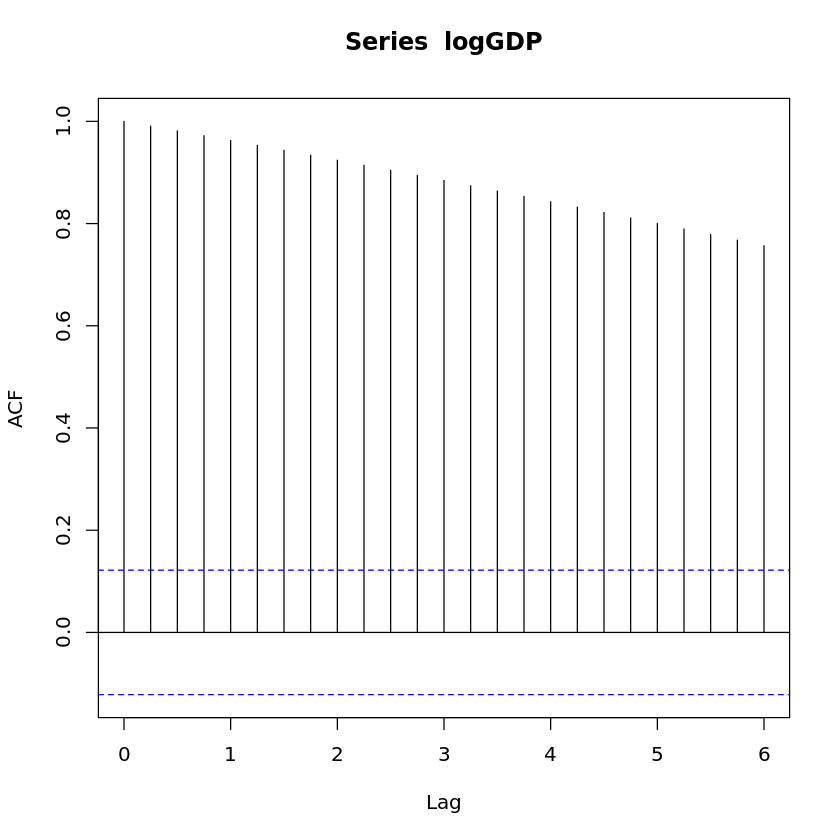

In [5]:
plot(logGDP)
acf(logGDP)

### (ii)

Use the plots you created in part (i) to comment on the properties of the time series `logGDP`.

#### Solution <a class="tocSkip">

The time plot shows that `logGDP`  has a positive trend over time. Whether the trend is stochastic (a 'drift') or deterministic cannot be established from looking at the plot. 

The ACF for `logGDP` only declines slowly with successive lags, indicating that there is strong persistence. (Note that the units in the horizontal axis refer to years, so by year 1 there are 4 autocorrelation coefficients depicted.)

---

###  <a class="tocSkip">

In Subsection 5.3 you saw that often a double transformation is applied to economic time series -- first taking logarithms and then first differences. 

### (iii)

Run the code below to create a new time series variable, `diffLogGDP`. (Note that this will not produce any output.)

In [6]:
diffLogGDP <- diff(logGDP)

### (iv) 

Using the empty code cell below, create a time plot of `diffLogGDP` along with its correlogram. 

#### Solution <a class="tocSkip">

The required code and resulting plots are given below.

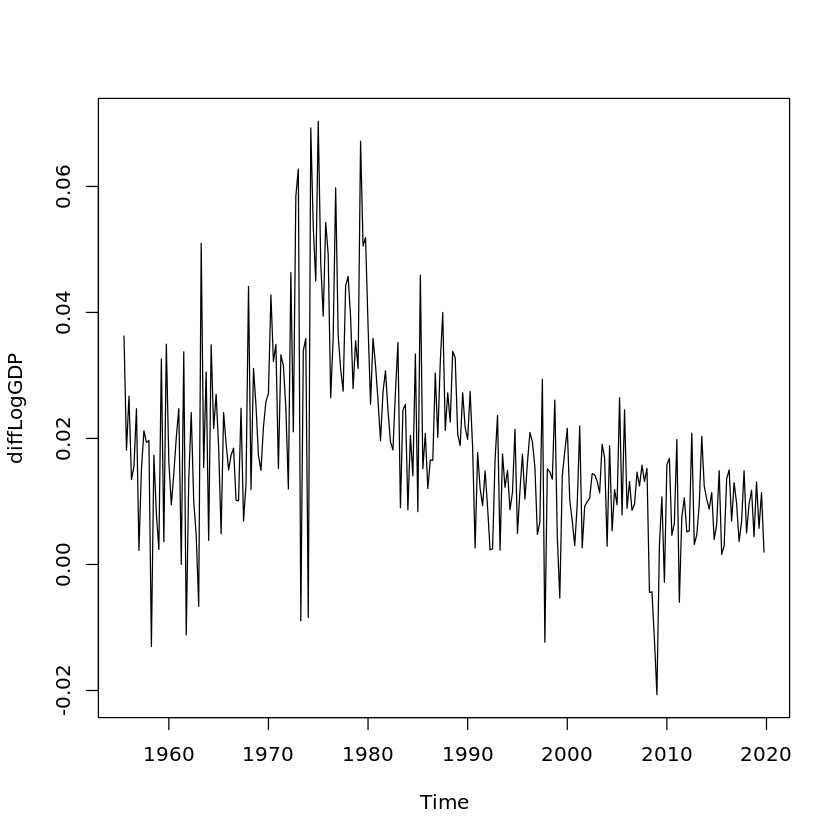

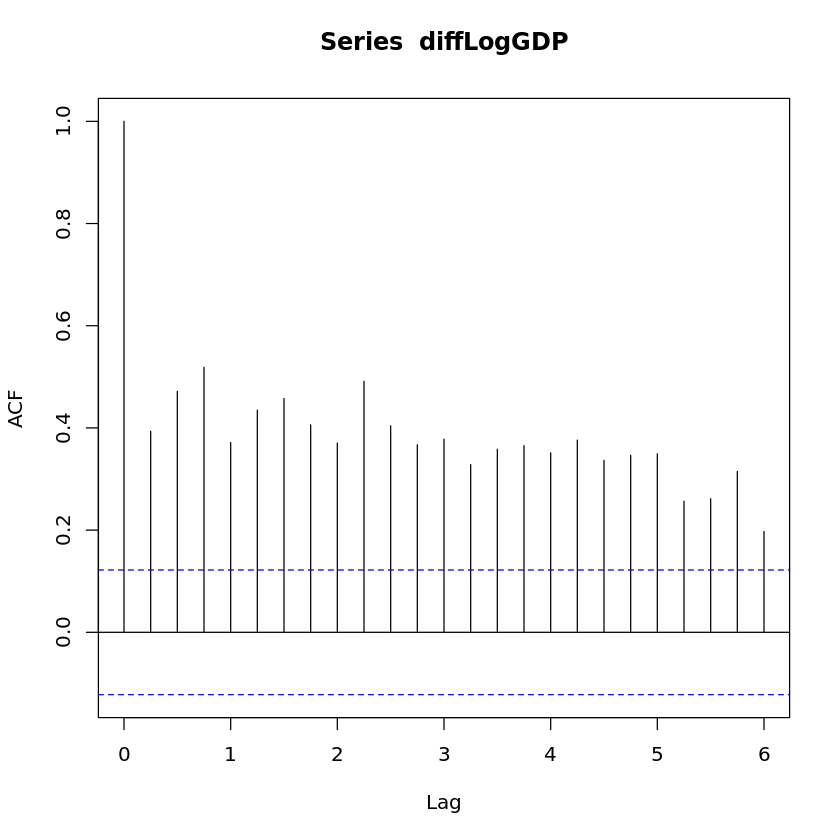

In [7]:
plot(diffLogGDP)
acf(diffLogGDP)

### (v)

Use the plots you created in part (iv) to comment on the properties of the time series `diffLogGDP`.

#### Solution <a class="tocSkip">

The time series `diffLogGDP` appears to have a stable mean, although it is not obvious whether the variance changes with time. So  `diffLogGDP` could be difference stationary I(0). 

The ACF falls sharply with the first lag and remains low with subsequent lags. Even if outside the 5% significance level confidence bands, this pattern resembles that of a white noise process.

## (d) Specifying ADF tests

In part (c) we have established that the first differences of `logGDP` could be stationary, even though `logGDP` itself showed high persistence. This means that `logGDP` itself might have a unit root, that is it might be I(1).

In this part we are going to carry out an ADF test to test for the presence of a unit root in `logGDP`.

Recall that there are three different variants of the ADF specification (recall Box 20 in Unit A2 for a summary of these three specifications in the DF test; the ADF would further include the terms with the lags): 
* Simple random walk
* Random walk with drift
* Random walk with drift and deterministic trend

### (i)

With reference to one of the plots you produced in part (c)(i), why is it reasonable to consider using the random walk with drift specification in this case?

#### Solution <a class="tocSkip">

As noted in part (c)(ii), this series shows an increasing trend which is common in series with a trend (stochastic and/or deterministic). To keep the specification of the ADF test parsimonious, and given the three main specifications of the ADF test (see Box 20 in Unit A2), we chose the model with just the stochastic trend, and not both.

---

###  <a class="tocSkip">

In Subsection 5.2 it was noted that for a time series $Y_t$, the model specification for the ADF test in the case of a random walk with drift is

$\Delta Y_t = d + \delta Y_{t−1} + \sum_{i=1}^m \gamma_i \Delta Y_{t−i} + u_t$,

where $m$ is the number of lags.

### (ii)

Suggest the number of lags, $m$, to use in this case.

#### Solution <a class="tocSkip">

It is common with quarterly data to use 4 lags. However information criteria (such as AIC as you have seen earlier in this module) can also be used to select the appropriate lag length.

### (iii)

Based on your answer to part (ii), write down the regression model for the ADF test for `logGDP`.

#### Solution <a class="tocSkip">

With 4 lags, the regression model is as follows.

$\Delta lnGDP_t=\beta_0+\delta lnGDP_{t-1}+\gamma_1 \Delta lnGDP_{t-1}+\gamma_2 \Delta lnGDP_{t-2}+\gamma_3 \Delta lnGDP_{t-3}+\gamma_4 \Delta lnGDP_{t-4}+u_t$.

### (iv)

Write down the null and alternative hypothesis associated with the ADF regression you gave in part (iii).

#### Solution <a class="tocSkip">

The null hypothesis is that the parameter $(\delta)$ is equal to 0 and the series is I(1):

$H_0: \delta = 0 $

The alternative hypothesis is that the parameter $(\delta)$ is less than zero and the series is stationary:

$H_1: \delta < 0 $

---

###  <a class="tocSkip">

ADF tests can be performed simply in R by using the `ur.df()` function from the `urca` package.

The arguments to `ur.df()` allow you to specify the model type and number of lags to include. You can either fix the number of lags yourself or use the Akaike information criterion (AIC) (and other information criteria too that are beyond the scope of this unit) to select the appropriate lag length.

For example, to test for a unit root in $Y_t$, using a simple random walk and 4 lags, and to obtain a summary of the results you would use the following code:

`summary(ur.df(Y, type = "none", lags = 4, selectlags = "Fixed"))`

The argument `selectlags = "Fixed"` could be replaced by  `selectlags = "AIC"` if you wish to use AIC to select the appropriate lag length.

The argument  `type = "none"` is replaced by `type = "drift"` to use the random walk model with drift and by 
`type = "trend"` to use random walk model with drift and trend.

### (v)

Run the code in the cell below to load the `urca` package and to perform the ADF test in part (e) using the `ur.df()` command. 

In [ ]:
library(urca)
summary(ur.df(logGDP, type = "drift", lags = 4, selectlags = "Fixed"))

###  <a class="tocSkip">

Much of the output you produced in part (v) probably looks familiar. It gives the results from fitting the regression model specified in part (iii).

As you saw in part (iv), the null hypothesis for th ADF is $H_0: \delta=0$ which would mean that the series contains a unit root. $\widehat{\delta}$ is the estimated coefficient of `z.lag.1` (the second line in the coefficients table you obtained in part (v).  The $p$-value given in that row of the table indicates that the estimate is negative and 'significant' at the 5% level, so we might be tempted to reject the null hypothesis that the series contains a unit root in favour of the alternative hypothesis that it is stationary.

However, remember from Section 5.1 that the ADF test statistic does not follow a standard $t$-distribution but rather a special *Dickey Fuller* distribution. The critical values for this distribution are given at the end of the output you obtained in part (v) and correspond to the first row, which is labelled `tau2`.

### (vi) 

Comment on the results from the ADF test you obtained in part (v). 

#### Solution <a class="tocSkip">

The test statistic has been calculated to be $-2.075$. This is smaller in magnitude than even the 10% critical value ($-2.57$). So we should not reject the null hypothesis that the series contains a unit root and hence is non-stationary.